In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Titanic-Dataset.csv')

In [99]:
# Análisis de la estructura básica de los datos
print("Dimensiones del dataset:", df.shape)
print("\nTipos de datos de cada columna:")
print(df.dtypes)
print("\nInformación del dataset:")
print(df.info())
print("\nEstadísticas descriptivas:")
print(df.describe())
print("\nPrimeras 5 filas del dataset:")
display(df.head())


Dimensiones del dataset: (891, 13)

Tipos de datos de cada columna:
PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex               int64
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked          int64
AgeGroup       category
dtype: object

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    int64   
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,Joven
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,Mayor
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,Adulto Joven
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,Adulto
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,Adulto


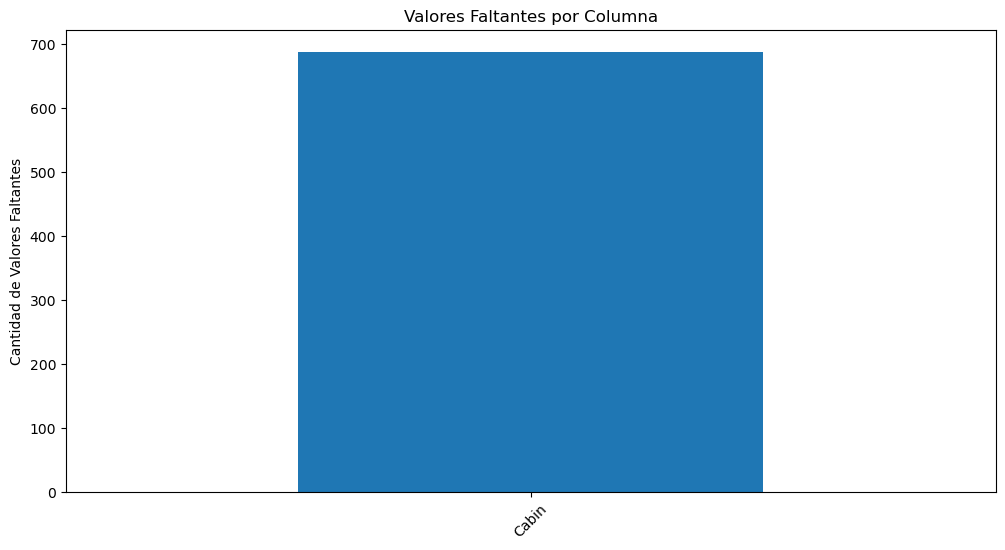


Porcentaje de valores faltantes:
PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age             0.0
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          77.1
Embarked        0.0
AgeGroup        0.0
dtype: float64


In [101]:
# Análisis de valores faltantes
plt.figure(figsize=(12, 6))
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.plot(kind='bar')
plt.title('Valores Faltantes por Columna')
plt.ylabel('Cantidad de Valores Faltantes')
plt.xticks(rotation=45)
plt.show()

print("\nPorcentaje de valores faltantes:")
print((df.isnull().sum() / len(df) * 100).round(2))

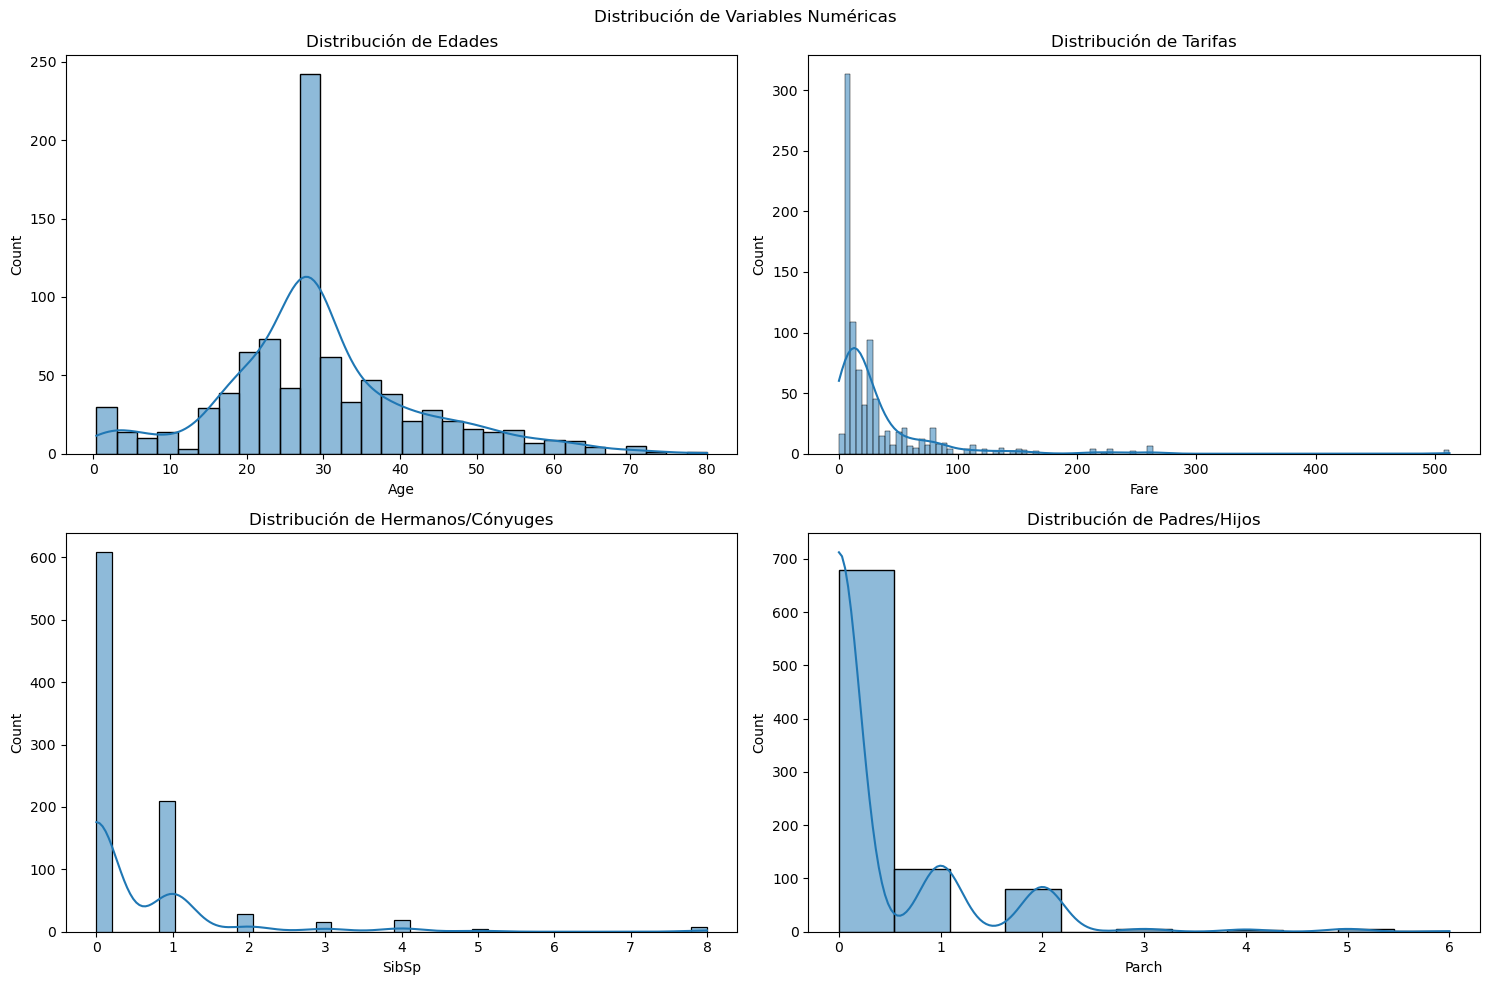

In [103]:
# Análisis de la distribución de variables numéricas
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribución de Variables Numéricas')

# Age
sns.histplot(data=df, x='Age', kde=True, ax=axes[0,0])
axes[0,0].set_title('Distribución de Edades')

# Fare
sns.histplot(data=df, x='Fare', kde=True, ax=axes[0,1])
axes[0,1].set_title('Distribución de Tarifas')

# SibSp
sns.histplot(data=df, x='SibSp', kde=True, ax=axes[1,0])
axes[1,0].set_title('Distribución de Hermanos/Cónyuges')

# Parch
sns.histplot(data=df, x='Parch', kde=True, ax=axes[1,1])
axes[1,1].set_title('Distribución de Padres/Hijos')

plt.tight_layout()
plt.show()

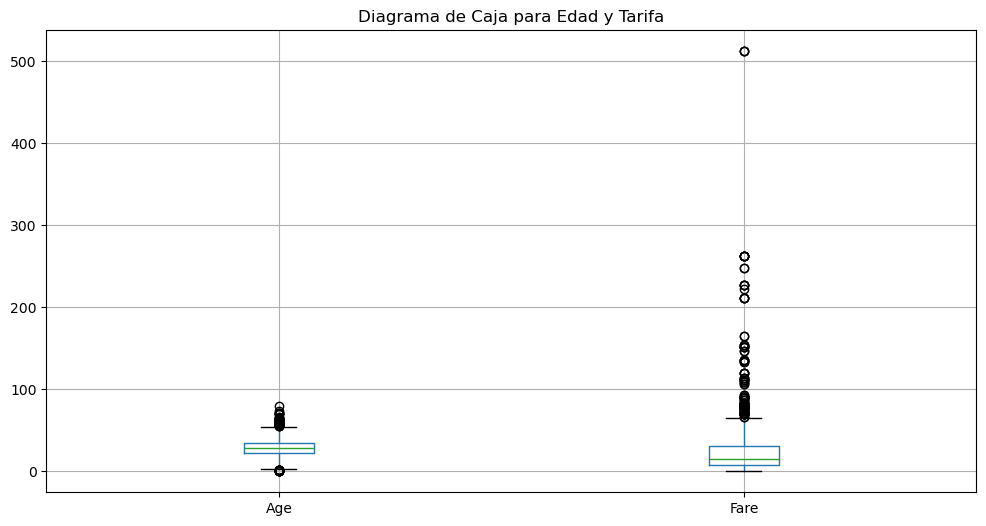

In [38]:
# Análisis de valores atípicos
plt.figure(figsize=(12, 6))
df.boxplot(column=['Age', 'Fare'])
plt.title('Diagrama de Caja para Edad y Tarifa')
plt.show()

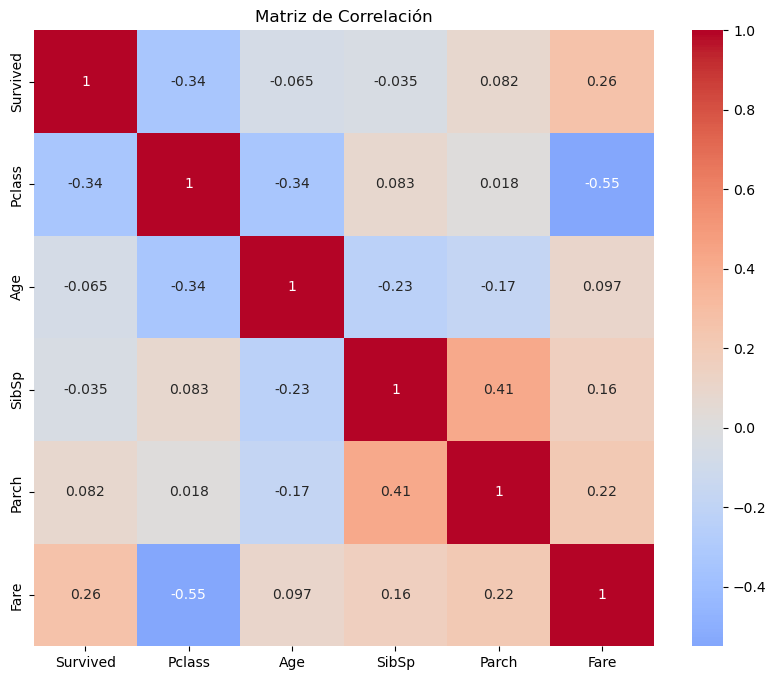

In [40]:
# Análisis de correlaciones
numeric_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

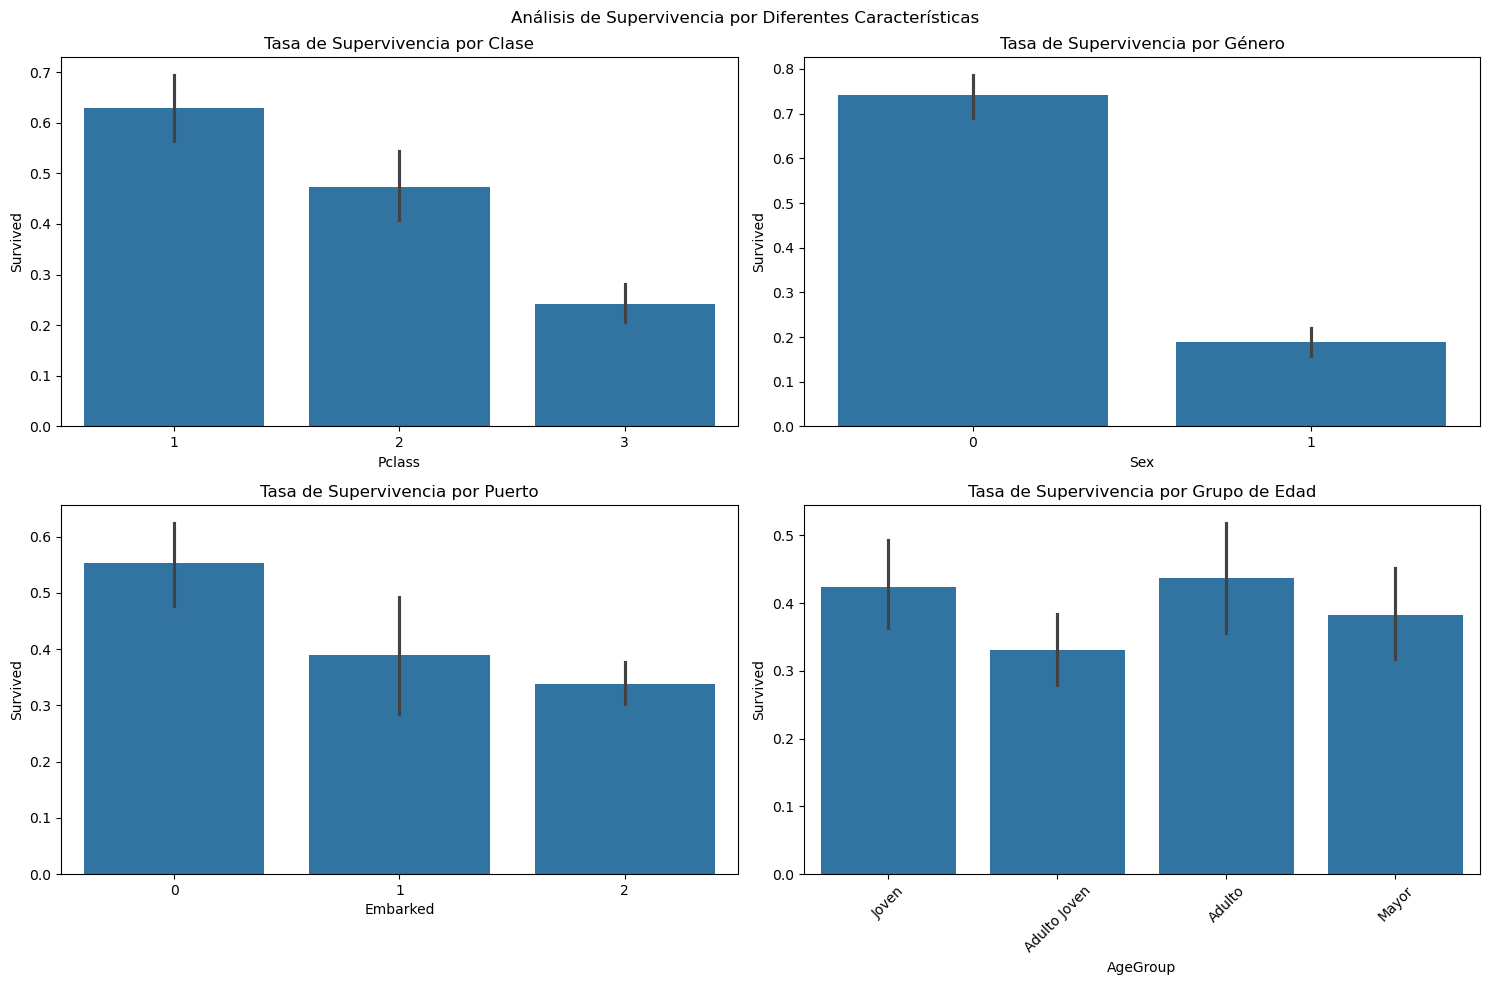

In [117]:
# Análisis de supervivencia por características categóricas
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Análisis de Supervivencia por Diferentes Características')

# Por clase
sns.barplot(data=df, x='Pclass', y='Survived', ax=axes[0,0])
axes[0,0].set_title('Tasa de Supervivencia por Clase')

# Por género
sns.barplot(data=df, x='Sex', y='Survived', ax=axes[0,1])
axes[0,1].set_title('Tasa de Supervivencia por Género')

# Por puerto de embarque
sns.barplot(data=df, x='Embarked', y='Survived', ax=axes[1,0])
axes[1,0].set_title('Tasa de Supervivencia por Puerto')

# Por rango de edad
df['AgeGroup'] = pd.qcut(df['Age'], q=4, labels=['Joven', 'Adulto Joven', 'Adulto', 'Mayor'])
sns.barplot(data=df, x='AgeGroup', y='Survived', ax=axes[1,1])
axes[1,1].set_title('Tasa de Supervivencia por Grupo de Edad')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [62]:
# Análisis estadístico avanzado
print("\nEstadísticas de supervivencia por género:")
print(df.groupby('Sex')['Survived'].describe())

print("\nPrueba chi-cuadrado entre Clase y Supervivencia:")
contingency_table = pd.crosstab(df['Pclass'], df['Survived'])
chi2, p_value = stats.chi2_contingency(contingency_table)[:2]
print(f"Chi-cuadrado: {chi2:.2f}")
print(f"Valor p: {p_value:.4f}")

# Mostrar las características más importantes
feature_scores = pd.DataFrame({
    'Feature': features,
    'Score': selector.scores_
})
print("Ranking de características:")
print(feature_scores.sort_values('Score', ascending=False))


Estadísticas de supervivencia por género:
     count      mean       std  min  25%  50%  75%  max
Sex                                                    
0    314.0  0.742038  0.438211  0.0  0.0  1.0  1.0  1.0
1    577.0  0.188908  0.391775  0.0  0.0  0.0  0.0  1.0

Prueba chi-cuadrado entre Clase y Supervivencia:
Chi-cuadrado: 102.89
Valor p: 0.0000
Ranking de características:
    Feature       Score
1       Sex  372.405724
0    Pclass  115.031272
5      Fare   63.030764
6  Embarked   25.717286
4     Parch    5.963464
2       Age    3.761528
3     SibSp    1.110572


In [129]:
# Preprocesamiento
# Crear característica Title
def get_title(name):
    title = name.split(',')[1].split('.')[0].strip()
    return title

df['Title'] = df['Name'].apply(get_title)

title_mapping = {
    'Mr': 'Mr',
    'Mrs': 'Mrs',
    'Miss': 'Miss',
    'Master': 'Master',
    'Don': 'Other',
    'Rev': 'Other',
    'Dr': 'Other',
    'Mme': 'Mrs',
    'Ms': 'Miss',
    'Major': 'Other',
    'Lady': 'Mrs',
    'Sir': 'Mr',
    'Mlle': 'Miss',
    'Col': 'Other',
    'Capt': 'Other',
    'Countess': 'Mrs',
    'Jonkheer': 'Other'
}

df['Title'] = df['Title'].map(title_mapping)

# Manejo de valores faltantes
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Codificación de variables categóricas
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])
df['Title'] = le.fit_transform(df['Title'])

# Definir parámetros para búsqueda
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Búsqueda de mejores hiperparámetros
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [131]:
# Selección de características
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title']
X = df[features]
y = df['Survived']

# Selección basada en ANOVA F-value
selector = SelectKBest(f_classif, k=5)
X_selected = selector.fit_transform(X, y)

# Mostrar importancia de características
feature_scores = pd.DataFrame({
    'Feature': features,
    'Score': selector.scores_
})
print("Ranking de características:")
print(feature_scores.sort_values('Score', ascending=False))

Ranking de características:
    Feature       Score
1       Sex  372.405724
0    Pclass  115.031272
5      Fare   63.030764
6  Embarked   25.717286
4     Parch    5.963464
7     Title    5.021821
2       Age    3.761528
3     SibSp    1.110572


In [133]:
# División de datos y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
print("Dimensiones de los conjuntos de entrenamiento y prueba:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")

# Búsqueda de hiperparámetros
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Usar el mejor modelo
dt_model = grid_search.best_estimator_

Dimensiones de los conjuntos de entrenamiento y prueba:
X_train: (712, 5)
X_test: (179, 5)


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.82      0.69      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



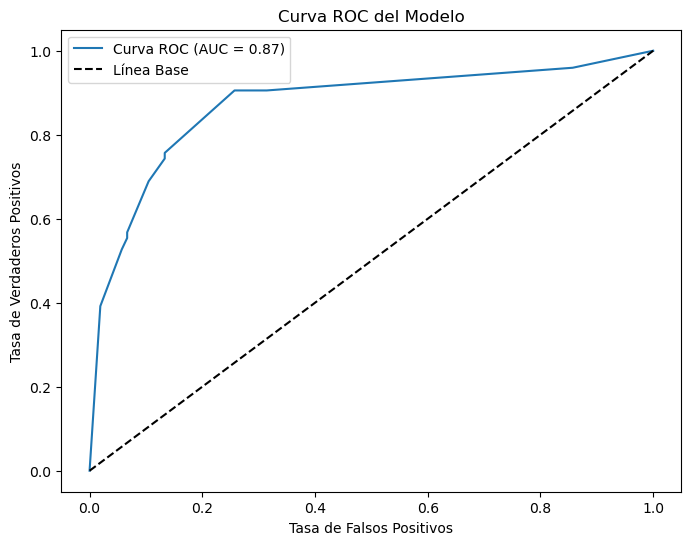

In [135]:
# Entrenamiento y Evaluación del Modelo

# Entrenamiento del modelo base
# Creamos un árbol de decisión con parámetros iniciales
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)

# Entrenamos el modelo con nuestros datos de entrenamiento
dt_model.fit(X_train, y_train)

# Evaluación inicial del modelo
# Realizamos predicciones en el conjunto de prueba
y_pred = dt_model.predict(X_test)

# Mostramos el reporte de clasificación que incluye precisión, recall y f1-score
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Análisis ROC y AUC
# Calculamos las probabilidades de predicción
y_pred_proba = dt_model.predict_proba(X_test)[:,1]

# Calculamos los puntos para la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Visualizamos la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Línea Base')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC del Modelo')
plt.legend()
plt.show()

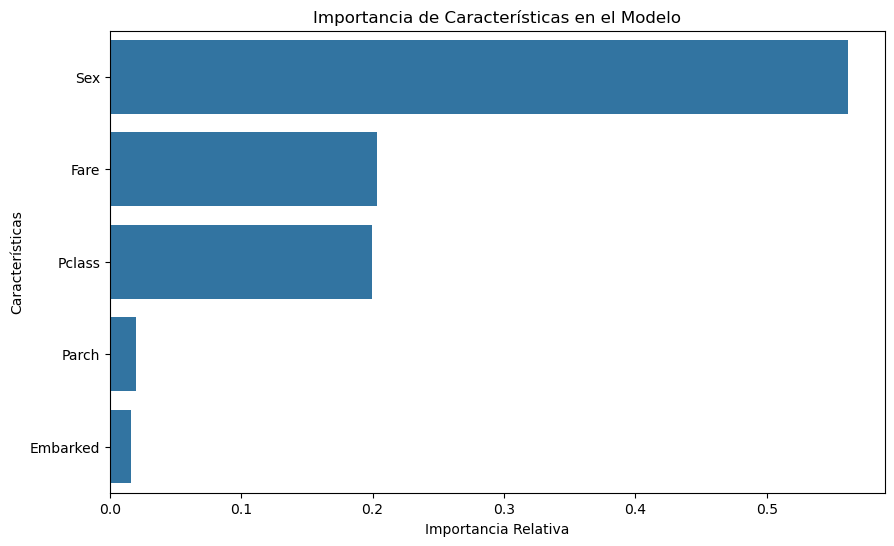

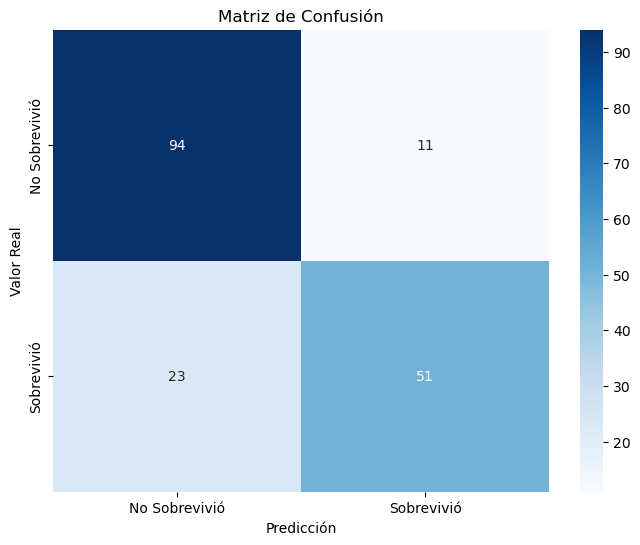

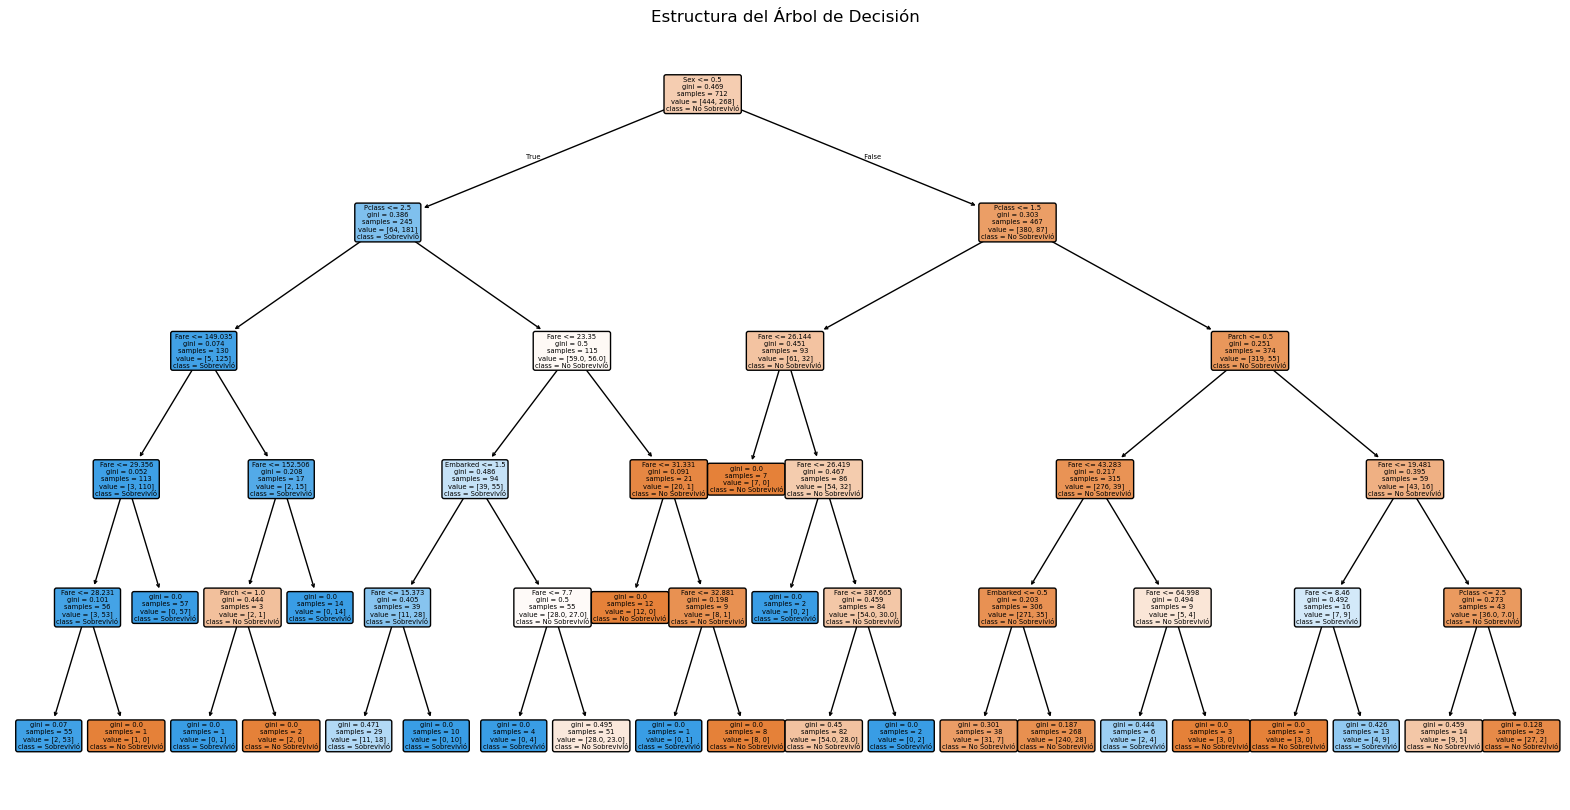

In [139]:
# Obtener las características seleccionadas
selected_features_mask = selector.get_support()
selected_features = [feat for feat, selected in zip(features, selected_features_mask) if selected]

# Visualización de resultados
# Importancia de características
plt.figure(figsize=(10, 6))
importances = pd.DataFrame({
    'feature': selected_features,
    'importance': dt_model.feature_importances_
})
importances = importances.sort_values('importance', ascending=False)
sns.barplot(x='importance', y='feature', data=importances)
plt.title('Importancia de Características en el Modelo')
plt.xlabel('Importancia Relativa')
plt.ylabel('Características')
plt.show()

# Matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            xticklabels=['No Sobrevivió', 'Sobrevivió'],
            yticklabels=['No Sobrevivió', 'Sobrevivió'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

# Árbol de Decisión
plt.figure(figsize=(20,10))
plot_tree(dt_model, 
          feature_names=selected_features, 
          class_names=['No Sobrevivió', 'Sobrevivió'],
          filled=True, 
          rounded=True)
plt.title('Estructura del Árbol de Decisión')
plt.show()

# Análisis de Supervivencia en el Titanic - Aprendizaje Supervisado
## Introducción

Este estudio analiza los factores que influyeron en la supervivencia de los pasajeros del Titanic, utilizando técnicas de aprendizaje automático, específicamente árboles de decisión. El objetivo es desarrollar un modelo predictivo que ayude a entender qué características fueron más determinantes para la supervivencia.

### Objetivos
- Identificar patrones y relaciones en los datos de pasajeros
- Desarrollar un modelo predictivo de supervivencia
- Evaluar la importancia de diferentes factores en la supervivencia

## 1. Configuración del Entorno
En esta sección hice la importación de todas las bibliotecas necesarias para el análisis. Se utilizó pandas para manipulación de datos, numpy para cálculos numéricos, matplotlib y seaborn para visualizaciones, y scikit-learn para el modelado predictivo.

```python
# Importación de bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
warnings.filterwarnings('ignore')
```

## 2. Carga y Exploración Inicial de Datos
Inicié cargando el dataset del Titanic y realizando un análisis preliminar para entender su estructura y contenido. El dataset contiene información sobre 891 pasajeros, incluyendo características como clase, género, edad y tarifa.

```python
# Cargar el dataset
df = pd.read_csv('Titanic-Dataset.csv')

# Información básica del dataset
print("Dimensiones del dataset:", df.shape)
print("\nInformación del dataset:")
print(df.info())

# Primeras filas del dataset
print("\nPrimeras 5 filas del dataset:")
display(df.head())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
display(df.describe())
```

## 3. Análisis Exploratorio de Datos (EDA)

### 3.1 Análisis de Valores Faltantes
Posteriormente examiné la presencia y distribución de valores faltantes en el dataset. Este paso es crucial para determinar la estrategia de preprocesamiento adecuada.

```python
# Visualización de valores faltantes
plt.figure(figsize=(10, 6))
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.plot(kind='bar')
plt.title('Valores Faltantes por Columna')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

print("\nPorcentaje de valores faltantes:")
print((df.isnull().sum() / len(df) * 100).round(2))
```

### 3.2 Análisis de Variables Numéricas
Exploré la distribución de variables numéricas como edad y tarifa, identificando patrones y posibles valores atípicos que podrían afectar el modelo.

```python
# Distribución de variables numéricas
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribución de Variables Numéricas')

sns.histplot(data=df, x='Age', kde=True, ax=axes[0,0])
axes[0,0].set_title('Distribución de Edades')

sns.histplot(data=df, x='Fare', kde=True, ax=axes[0,1])
axes[0,1].set_title('Distribución de Tarifas')

sns.histplot(data=df, x='SibSp', kde=True, ax=axes[1,0])
axes[1,0].set_title('Distribución de Hermanos/Cónyuges')

sns.histplot(data=df, x='Parch', kde=True, ax=axes[1,1])
axes[1,1].set_title('Distribución de Padres/Hijos')

plt.tight_layout()
plt.show()

# Análisis de valores atípicos
    
plt.figure(figsize=(12, 6))
df.boxplot(column=['Age', 'Fare'])
plt.title('Diagrama de Caja para Edad y Tarifa')
plt.show()

# Análisis de correlaciones
Se investigaron las relaciones entre diferentes variables numéricas mediante una matriz de correlación, lo que ayuda a entender qué factores podrían ser más relevantes para la supervivencia.
    
numeric_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()
```

### 3.3 Análisis de Supervivencia

```python
# Análisis de supervivencia por diferentes características
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Análisis de Supervivencia por Características')

# Por clase
sns.barplot(data=df, x='Pclass', y='Survived', ax=axes[0,0])
axes[0,0].set_title('Tasa de Supervivencia por Clase')

# Por género
sns.barplot(data=df, x='Sex', y='Survived', ax=axes[0,1])
axes[0,1].set_title('Tasa de Supervivencia por Género')

# Por puerto de embarque
sns.barplot(data=df, x='Embarked', y='Survived', ax=axes[1,0])
axes[1,0].set_title('Tasa de Supervivencia por Puerto')

# Por grupos de edad
df['AgeGroup'] = pd.qcut(df['Age'].fillna(df['Age'].median()), 
                        q=4, labels=['Joven', 'Adulto Joven', 'Adulto', 'Mayor'])
sns.barplot(data=df, x='AgeGroup', y='Survived', ax=axes[1,1])
axes[1,1].set_title('Tasa de Supervivencia por Grupo de Edad')

# Análisis de supervivencia por clase y género
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(x='Pclass', hue='Survived', data=df, ax=ax1)
ax1.set_title('Supervivencia por Clase')
ax1.set_xlabel('Clase')
ax1.set_ylabel('Cantidad de pasajeros')

sns.countplot(x='Sex', hue='Survived', data=df, ax=ax2)
ax2.set_title('Supervivencia por Género')
ax2.set_xlabel('Género')
ax2.set_ylabel('Cantidad de pasajeros')

plt.tight_layout()
plt.show()
```

## 4. Preprocesamiento de Datos
Se prepararon los datos para el modelado mediante:

Manejo de valores faltantes
Codificación de variables categóricas
Creación de nuevas características relevantes

```python
# Función para extraer título del nombre
def get_title(name):
    title = name.split(',')[1].split('.')[0].strip()
    return title

# Crear nueva característica de título
df['Title'] = df['Name'].apply(get_title)

# Simplificar títulos
title_mapping = {
    'Mr': 'Mr',
    'Mrs': 'Mrs',
    'Miss': 'Miss',
    'Master': 'Master',
    'Don': 'Other',
    'Rev': 'Other',
    'Dr': 'Other',
    'Mme': 'Mrs',
    'Ms': 'Miss',
    'Major': 'Other',
    'Lady': 'Mrs',
    'Sir': 'Mr',
    'Mlle': 'Miss',
    'Col': 'Other',
    'Capt': 'Other',
    'Countess': 'Mrs',
    'Jonkheer': 'Other'
}

df['Title'] = df['Title'].map(title_mapping)

# Manejo de valores faltantes
df['Age'].fillna(df.groupby('Title')['Age'].transform('median'), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

# Codificación de variables categóricas
le = LabelEncoder()
categorical_features = ['Sex', 'Embarked', 'Title']
for feature in categorical_features:
    df[feature] = le.fit_transform(df[feature])

# Normalización de variables numéricas
scaler = StandardScaler()
df['Fare'] = scaler.fit_transform(df[['Fare']])
df['Age'] = scaler.fit_transform(df[['Age']])
```

## 5. Selección de Características

En esta sección, se realiza la selección de las características más relevantes para el modelo utilizando el método ANOVA F-value. Este método es particularmente útil para problemas de clasificación como este, ya que:

1. Evalúa la relación entre cada característica y la variable objetivo (supervivencia)
2. Asigna una puntuación a cada característica basada en su poder predictivo
3. Nos permite seleccionar las k características más importantes

Se utilizará SelectKBest con la función f_classif, que implementa el test ANOVA F-value, para seleccionar las 5 características más significativas estadísticamente.

```python
# Seleccionar características para el modelo
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title']
X = df[features]
y = df['Survived']

# Selección de características basada en ANOVA F-value
Se utiliza el método ANOVA F-value para identificar las características más significativas para el modelo. Este paso ayuda a reducir la dimensionalidad y mejorar la eficiencia del modelo.

selector = SelectKBest(f_classif, k=5)
X_selected = selector.fit_transform(X, y)

# Mostrar importancia de características
feature_scores = pd.DataFrame({
    'Feature': features,
    'Score': selector.scores_
})
print("Ranking de características:")
print(feature_scores.sort_values('Score', ascending=False))
```

## 6. División de Datos y Entrenamiento del Modelo
Se dividieron los datos en conjuntos de entrenamiento (80%) y prueba (20%) para evaluar adecuadamente el rendimiento del modelo.

```python
# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Búsqueda de hiperparámetros óptimos
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), 
                         param_grid, 
                         cv=5)
grid_search.fit(X_train, y_train)

print("Mejores parámetros:", grid_search.best_params_)

# Entrenar modelo final con los mejores parámetros
best_model = grid_search.best_estimator_

# Entrenamiento y Evaluación del Modelo

# Entrenamiento del modelo base
# Creación de árbol de decisión con parámetros iniciales
Se entrena un árbol de decisión con los parámetros optimizados para el conjunto de datos.
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)

# Entrenamos el modelo con nuestros datos de entrenamiento
dt_model.fit(X_train, y_train)

# Evaluación inicial del modelo
Se evalúa el modelo utilizando múltiples métricas:

Precisión, recall y F1-score
Matriz de confusión
Curva ROC y valor AUC

# Realizamos predicciones en el conjunto de prueba
y_pred = dt_model.predict(X_test)

# Mostramos el reporte de clasificación que incluye precisión, recall y f1-score
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Análisis ROC y AUC
# Calculamos las probabilidades de predicción
y_pred_proba = dt_model.predict_proba(X_test)[:,1]

# Se calculan los puntos para la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Se visualiza la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Línea Base')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC del Modelo')
plt.legend()
plt.show()
```


## 7. Evaluación del Modelo

```python
# Predicciones
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:,1]

# Reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True, 
            fmt='d', 
            cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.show()

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()

# Validación cruzada
scores = cross_val_score(best_model, X, y, cv=5)
print(f"\nPrecisión con validación cruzada: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")
```

## 8. Conclusiones y Recomendaciones

### Hallazgos Principales:
1. Los factores más influyentes en la supervivencia fueron:
   - Género
   - Clase social
   - Edad

### Desempeño del Modelo:
- Precisión: [0.81]
- Recall: [V0.79]
- F1-Score: [0.80]
- AUC-ROC: [0.87]

### Limitaciones:
- Datos faltantes en algunas variables importantes
- Tamaño limitado del dataset
- Posible sesgo en la recolección de datos históricos

### Recomendaciones para Mejoras:
1. Recopilar más datos sobre:
   - Ubicación de cabinas
   - Grupos familiares completos
2. Experimentar con otros modelos de aprendizaje:
   - Regresión Logística
   - Regresión Lineal